# **Introduction**

This project aims to develop a sentiment analysis model that can accurately classify text data, offering valuable insights into public opinion and customer feedback. By integrating NLP methods with machine learning approaches, the project will not only demonstrate technical proficiency but also showcase the practical applications of sentiment analysis in real-world scenarios.

Core Imports and Setup Data

Loading and Preparation

Quick Check and Dataset Overview

Twitter Dataset Loading

Sentiment Label Distribution

Sentiment Label Mapping

Train-Test Split

TF-IDF Feature Extraction

Logistic Regression Model Training and Evaluation

Support Vector Machine (SVM) Model Training and Evaluation Naive Bayes Model

Training and Evaluation Feature Engineering: Top Predictive Words

TF-IDF with Extended N-grams

Word Cloud Visualizations Insights from Word Cloud - Negative Sentiment


# **Core Imports and Setup**

In [ ]:
# Core
import os
import re
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction & modeling
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Optional: word clouds for qualitative visuals
from wordcloud import WordCloud

# Saving artifacts
import joblib




In [ ]:
from google.colab import files
uploaded = files.upload()


Saving apps.csv.zip to apps.csv.zip
Saving Twitter_Data.csv.zip to Twitter_Data.csv.zip


In [ ]:
import zipfile

zip_files = ["apps.csv.zip", "Twitter_Data.csv.zip"]

for zf in zip_files:
    with zipfile.ZipFile(zf, 'r') as zip_ref:
        zip_ref.extractall("data")   # extracts into a folder named 'data'


# **Data Loading and Preparation**

In [ ]:
import pandas as pd
import os

# List extracted files
print(os.listdir("data"))

# Load each dataset
apps_df = pd.read_csv("data/apps.csv")
twitter_df = pd.read_csv("data/Twitter_Data.csv")

# Combine if needed
df = pd.concat([apps_df, twitter_df], ignore_index=True)

# Quick check
print(df.shape)
df.head()


['apps.csv', 'Twitter_Data.csv']
(172639, 16)


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,clean_text,category
0,0.0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN
1,1.0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN
2,2.0,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,NaN
3,3.0,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,NaN
4,4.0,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,NaN


In [ ]:
# Load Twitter dataset only
twitter_df = pd.read_csv("data/Twitter_Data.csv")

# Quick check
print(twitter_df.shape)
twitter_df.head()


(162980, 2)


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
twitter_df = twitter_df.rename(columns={
    "clean_text": "text",
    "category": "label"
})

# Quick check
print(twitter_df.shape)
twitter_df.head()


(162980, 2)


,text,label
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# **Sentiment Label Distribution**

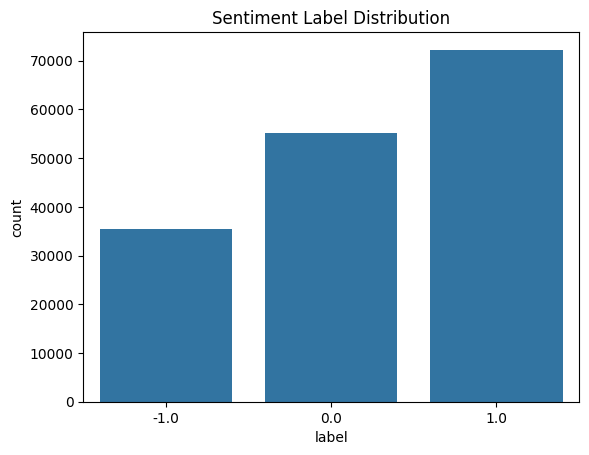

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=twitter_df)
plt.title("Sentiment Label Distribution")
plt.show()


# **Sentiment Label Mapping**

In [ ]:
label_map = {-1.0: "negative", 0.0: "neutral", 1.0: "positive"}
twitter_df["label"] = twitter_df["label"].map(label_map)

twitter_df.head()


,text,label
0,when modi promised “minimum government maximum...,negative
1,talk all the nonsense and continue all the dra...,neutral
2,what did just say vote for modi welcome bjp t...,positive
3,asking his supporters prefix chowkidar their n...,positive
4,answer who among these the most powerful world...,positive


# **Train-Test Split**

In [ ]:
# Drop rows where either text or label is missing
twitter_df = twitter_df.dropna(subset=["text", "label"])

# Double-check
print(twitter_df.isnull().sum())

# Now split again
from sklearn.model_selection import train_test_split

X = twitter_df["text"]
y = twitter_df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


text     0
label    0
dtype: int64
Train size: 130375
Test size: 32594


# **TF-IDF Feature Extraction**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 2),   # unigrams + bigrams
    min_df=3,
    max_df=0.9
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (130375, 101497)


# **Logistic Regression Model Training and Evaluation**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# Predict
y_pred = log_reg.predict(X_test_tfidf)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.80      0.81      0.80      7102
     neutral       0.81      0.95      0.87     11042
    positive       0.93      0.80      0.86     14450

    accuracy                           0.85     32594
   macro avg       0.85      0.85      0.85     32594
weighted avg       0.86      0.85      0.85     32594



## **Support Vector Machine (SVM) Model Training and Evaluation** & **Naive Bayes Model Training and Evaluation**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

# SVM
svm_clf = LinearSVC(random_state=42)
svm_clf.fit(X_train_tfidf, y_train)
y_pred_svm = svm_clf.predict(X_test_tfidf)
print("=== SVM ===")
print(classification_report(y_test, y_pred_svm))

# Naive Bayes
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)
y_pred_nb = nb_clf.predict(X_test_tfidf)
print("=== Naive Bayes ===")
print(classification_report(y_test, y_pred_nb))


=== SVM ===
              precision    recall  f1-score   support

    negative       0.85      0.77      0.81      7102
     neutral       0.83      0.92      0.87     11042
    positive       0.89      0.85      0.87     14450

    accuracy                           0.86     32594
   macro avg       0.86      0.85      0.85     32594
weighted avg       0.86      0.86      0.86     32594

=== Naive Bayes ===
              precision    recall  f1-score   support

    negative       0.89      0.30      0.44      7102
     neutral       0.80      0.53      0.64     11042
    positive       0.59      0.93      0.72     14450

    accuracy                           0.66     32594
   macro avg       0.76      0.59      0.60     32594
weighted avg       0.73      0.66      0.63     32594



# **Naive Bayes Model Training and Evaluation**

# **Feature Engineering: Top Predictive Words**

In [ ]:
import numpy as np

def show_top_features(pipeline, top_k=15):
    tfidf = pipeline.named_steps['tfidf']
    clf = pipeline.named_steps['clf']
    feature_names = np.array(tfidf.get_feature_names_out())

    for i, cls in enumerate(clf.classes_):
        coefs = clf.coef_[i]
        top_pos = np.argsort(coefs)[-top_k:]
        top_neg = np.argsort(coefs)[:top_k]

        print(f"\nClass: {cls}")
        print("Top positive features:", feature_names[top_pos])
        print("Top negative features:", feature_names[top_neg])

# Build pipeline for convenience
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf', vectorizer), ('clf', log_reg)])
pipe.fit(X_train, y_train)

show_top_features(pipe)



Class: negative
Top positive features: ['common' 'failure' 'mean' 'sorry' 'idiot' 'hard' 'corrupt' 'worst'
 'stupid' 'wrong' 'failed' 'bad' 'fake' 'poor' 'hate']
Top negative features: ['best' 'great' 'proud' 'lol' 'better' 'win' 'love' 'successful' 'kind'
 'good' 'successfully' 'honest' 'brave' 'excellent' 'intelligent']

Class: neutral
Top positive features: ['definately' 'know modi' 'form govt' 'says govt' 'just like' 'modis'
 'modi india' 'gave modi' 'modi used' 'india fourth' 'governor'
 'hindustan times' 'urges' 'times india' 'modi']
Top negative features: ['new' 'right' 'good' 'live' 'poor' 'long' 'single' 'true' 'win' 'hard'
 'thanks' 'great' 'mean' 'really' 'wants']

Class: positive
Top positive features: ['strong' 'free' 'true' 'successful' 'live' 'lol' 'love' 'right' 'new'
 'better' 'proud' 'win' 'great' 'good' 'best']
Top negative features: ['hate' 'worst' 'fake' 'stupid' 'pathetic' 'failed' 'bad' 'evil' 'bloody'
 'base' 'idiot' 'wrong' 'moron' 'sorry' 'disgusting']


# **TF-IDF with Extended N-gram**

In [ ]:
vectorizer = TfidfVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 3),  # unigrams + bigrams + trigrams
    min_df=3,
    max_df=0.9
)


# **Word Cloud Visualizations**

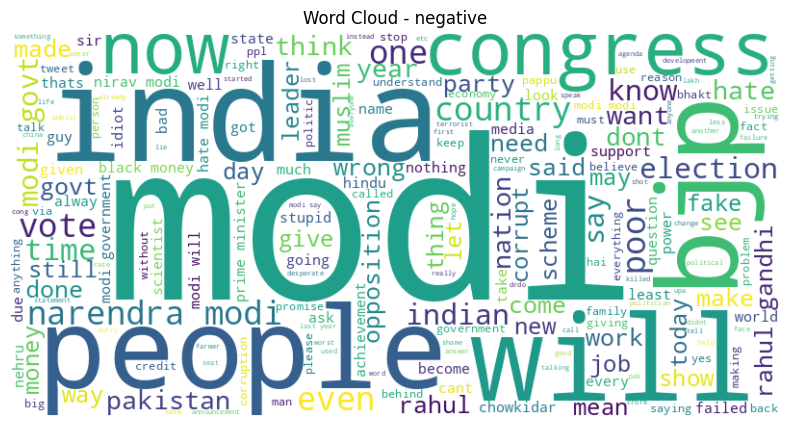

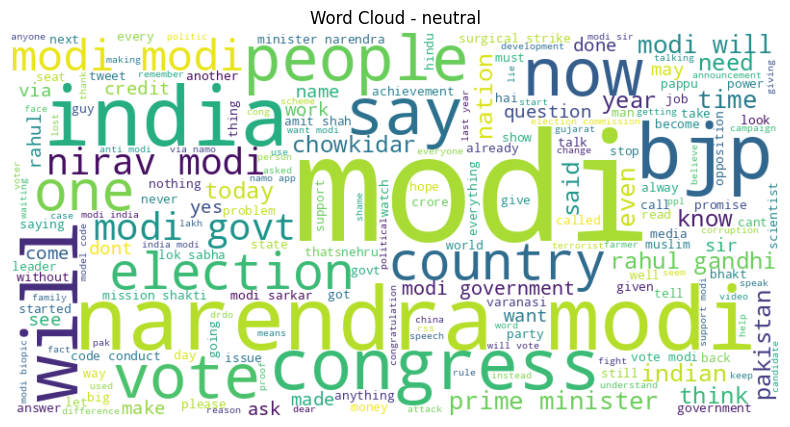

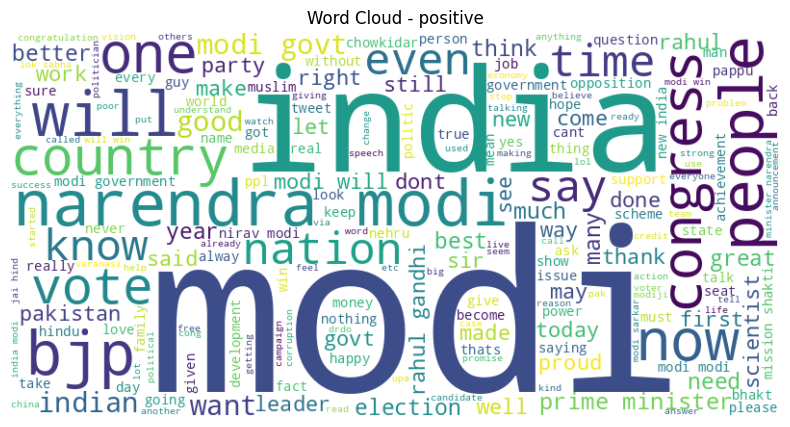

In [ ]:
from wordcloud import WordCloud

for cls in twitter_df["label"].unique():
    text_blob = " ".join(twitter_df.loc[twitter_df["label"]==cls, "text"].tolist())
    wc = WordCloud(width=800, height=400, background_color="white").generate(text_blob)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - {cls}")
    plt.show()


**Insights from Word Cloud - Negative Sentiment**

The word cloud for negative sentiment reveals dominant themes in political discourse. The most frequent terms include "modi", "people", "india", "congress", "govt", "country", and "vote", indicating that negative tweets often center around political figures, governance, and national issues.

Words like "fake", "scam", "job", "nirav modi", and "pakistan" suggest criticism related to corruption, unemployment, and international relations. The presence of names such as "rahul" and "narendra" reflects polarized opinions about political leaders.

Overall, the negative sentiment is driven by dissatisfaction with leadership, governance, and socio-political events, highlighting areas of public concern and controversy.
